In [84]:
# Update pip and install seaborn for visualization
!python -m pip install -Uq pip
# !pip install -q seaborn==0.11.1 sagemaker==2.117.0 boto3=1.24.52
# ! pip install -q seaborn==0.13.2 sagemaker==2.214.2 boto3=+2.49.0

ERROR: Invalid requirement: 'boto3=2.49.0'
Hint: = is not a valid operator. Did you mean == ?


In [67]:
# Cell 2
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# grab the pastel color set from seaborn
colors = sns.color_palette('pastel')
sns.set(color_codes=True)

# these two variables have the path to the csv files
CLAIMS_DATA_CSV = "./data2/claims_preprocessed.csv"
CUSTOMER_DATA_CSV = "./data2/customers_preprocessed.csv"


# pull the data into the notebook by reading it from the folder. Let's create two Dataframe
df_claims = pd.read_csv(CLAIMS_DATA_CSV, index_col=0)
df_customers = pd.read_csv(CUSTOMER_DATA_CSV, index_col=0)

In [68]:
# Cell 3
# let's Check the claims dataset
df_claims.head()

,incident_severity,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,incident_day,...,incident_type_breakin,incident_type_theft,collision_type_front,collision_type_rear,collision_type_side,collision_type_na,authorities_contacted_police,authorities_contacted_none,authorities_contacted_fire,authorities_contacted_ambulance
policy_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,3,0,2,1.0,0,15000,15000,11,18,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,2,3,0,0.0,30000,19500,49500,2,26,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,2,0,1,0.0,0,10000,10000,3,18,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1,0,0,0.0,0,14000,14000,1,22,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,2,0,2,0.0,0,12000,12000,3,30,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
# Cell 5
# and the customer dataset
df_customers.head()

,customer_age,customer_education,months_as_customer,policy_deductable,policy_annual_premium,policy_liability,auto_year,num_claims_past_year,num_insurers_past_5_years,customer_gender_male,customer_gender_female,policy_state_ca,policy_state_wa,policy_state_az,policy_state_or,policy_state_nv,policy_state_id
policy_id,,,,,,,,,,,,,,,,,
1,54,2,381,750,3000,1,2019,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,41,3,31,750,3000,3,2017,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,3,84,750,3000,3,2014,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,74,4,123,750,2600,2,2018,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,39,1,34,750,3000,2,2019,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Check for any missing data

In [70]:
# Cell 6

# This will print if there ae an empty rows in the two datasets
print(f"There are {df_claims.isnull().sum().sum()} empty rows in claims.csv")
print(f"There are {df_customers.isnull().sum().sum() } empty rows in customers.csv")

There are 0 empty rows in claims.csv
There are 0 empty rows in customers.csv


### Combine datasets

In [71]:
# cell 7

# You can also combine the datasets directly using two data frames
# df_combined = pd.concat([df_claims, df_customers], axis=1)
df_combined = pd.read_csv("./data2/claims_customer.csv")

# get rid of an unwanted column
df_combined = df_combined.loc[:,~df_combined.columns.str.contains("^Unnamed: 0")]

# once again, let's Check a samll slice of the data to check the columns
df_combined.head()


,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,1675,0,0,750,0,0,2,0,1,0,...,0,20,12000.0,0,0,3000,1,0,0,0
1,9,0,0,750,0,0,9,0,1,1,...,0,15,18500.0,0,1,3000,0,0,0,0
2,1687,0,1,750,0,0,7,1,1,0,...,0,16,17500.0,0,1,3000,0,0,0,0
3,1687,0,1,750,0,0,7,0,1,1,...,0,16,17500.0,0,1,3000,0,0,0,0
4,1692,0,0,750,2,0,6,1,1,0,...,0,8,21500.0,0,1,2800,1,0,0,1


In [72]:
# Cell 8

df_combined.describe()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
count,20000.00000,20000.000000,20000.0000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2500.50000,0.048200,0.6204,751.13000,0.866100,0.070000,6.713200,0.372400,1.412200,0.576500,...,0.02730,11.786800,17426.083700,0.030000,0.857200,2925.400000,0.113600,0.121000,0.220900,0.425400
std,1443.41173,0.214194,0.4853,13.57322,1.097921,0.255153,3.654396,0.483456,0.897291,0.494125,...,0.16296,5.337918,10043.773599,0.170591,0.349878,143.516096,0.317333,0.326135,0.414864,0.494416
min,1.00000,0.000000,0.0000,750.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1000.000000,0.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.75000,0.000000,0.0000,750.00000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,...,0.00000,8.000000,10474.250000,0.000000,1.000000,2900.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.50000,0.000000,1.0000,750.00000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,...,0.00000,12.000000,15000.000000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.25000,0.000000,1.0000,750.00000,2.000000,0.000000,10.000000,1.000000,1.000000,1.000000,...,0.00000,16.000000,22005.500000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,1.000000
max,5000.00000,1.000000,1.0000,1100.00000,5.000000,1.000000,12.000000,1.000000,5.000000,1.000000,...,1.00000,23.000000,51051.000000,1.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# Cell 9

combined_stats = []

# loop over all the columns
for col in df_combined.columns:
    # append all stats per column to a list
    combined_stats.append(
        (
            col,
            df_combined[col].nunique(),
            df_combined[col].isnull().sum(),
            df_combined[col].value_counts(normalize=True, dropna=False).values[0] * 100,
            df_combined[col].dtype,
        )
    )

# finally create a enw dataframe with all these values
stats_df = pd.DataFrame(
    combined_stats,
    columns=["feature", "unique_values", "percent_missing", "percent_largest_category", "datatype"],
)

# sort these values by largest category column (descending)
stats_df.sort_values("percent_largest_category", ascending=False)
    

,feature,unique_values,percent_missing,percent_largest_category,datatype
3,policy_deductable,8,0,98.94,int64
28,authorities_contacted_ambulance,2,0,97.45,int64
37,policy_state_id,2,0,97.27,int64
35,authorities_contacted_fire,2,0,97.20,int64
40,fraud,2,0,97.00,int64
36,driver_relationship_other,2,0,96.06,int64
16,driver_relationship_child,2,0,95.49,int64
27,policy_state_nv,2,0,95.23,int64
1,incident_type_theft,2,0,95.18,int64
23,num_claims_past_year,8,0,93.28,int64


### Data Visualization

#### Bar plots and Pair plots

In [74]:
df_customers.head()

,customer_age,customer_education,months_as_customer,policy_deductable,policy_annual_premium,policy_liability,auto_year,num_claims_past_year,num_insurers_past_5_years,customer_gender_male,customer_gender_female,policy_state_ca,policy_state_wa,policy_state_az,policy_state_or,policy_state_nv,policy_state_id
policy_id,,,,,,,,,,,,,,,,,
1,54,2,381,750,3000,1,2019,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,41,3,31,750,3000,3,2017,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,3,84,750,3000,3,2014,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,74,4,123,750,2600,2,2018,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,39,1,34,750,3000,2,2019,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


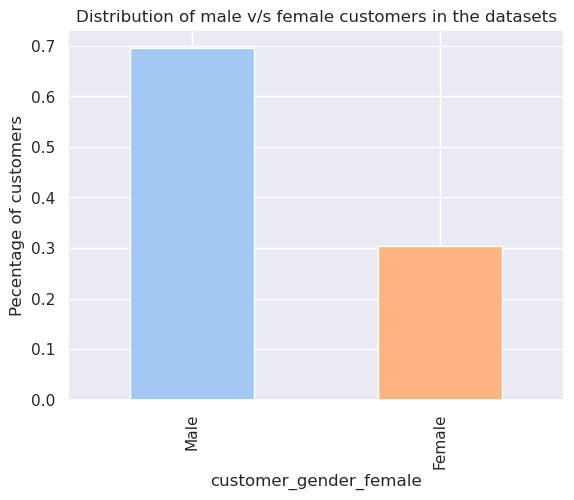

In [75]:
# Cell 10

# remember value_count gives us the counts of unique values in a columns
df_customers.customer_gender_female.value_counts(normalize=True).plot.bar(color=colors[:2])
plt.xticks([0,1], ["Male", "Female"]);
plt.ylabel("Pecentage of customers")
plt.title("Distribution of male v/s female customers in the datasets");

Next - plot the bar graph of fraudulent claims from the claims dataset

Text(0.5, 1.0, 'Distribution of fraudulent v/s non-fraudulent claims')

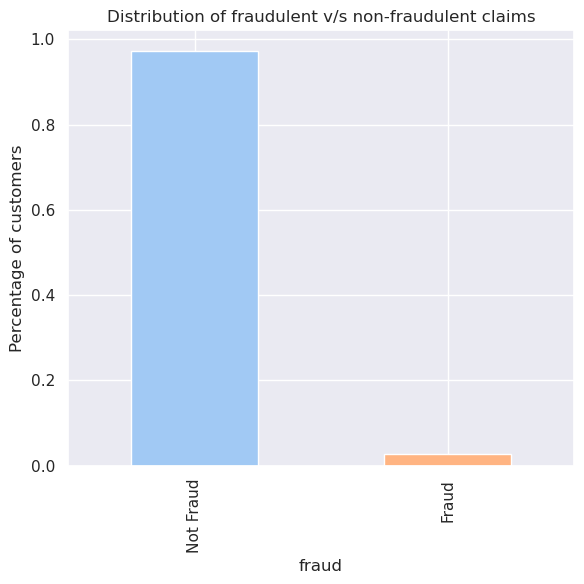

In [76]:
# Cell 11

plt.figure(figsize=(6,6), tight_layout=True)
df_claims.fraud.value_counts(normalize=True).plot.bar(color=colors[:2])
plt.xticks([0, 1], ["Not Fraud", "Fraud"]);
plt.ylabel("Percentage of customers")
plt.title("Distribution of fraudulent v/s non-fraudulent claims")

Let's plot the education categories of the customers

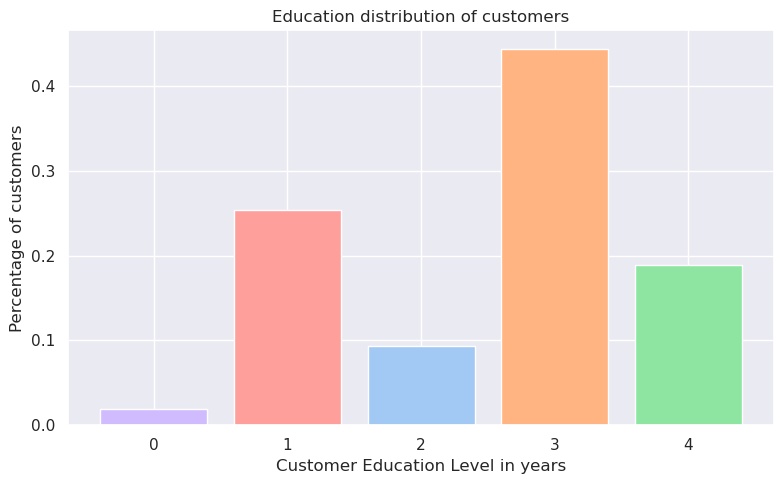

In [77]:
# Cell 12

# set size of the plot
plt.figure(figsize=(8,5), tight_layout=True)

# This prepare the data that need to be displyead
educ = df_customers.customer_education.value_counts(normalize=True, sort=False)

# this plots the bar chart
plt.bar(educ.index, educ.values, color=colors[:5])
plt.title("Education distribution of customers")
plt.ylabel("Percentage of customers")
plt.xlabel("Customer Education Level in years");

Let's plot total claim amounts

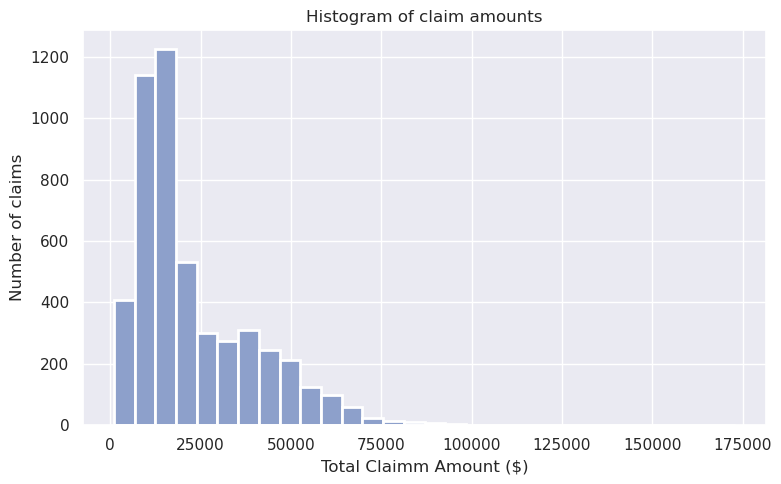

In [78]:
# Cell 13

plt.figure(figsize=(8,5), tight_layout=True)

# this will create a histogram with same sized 30 bins
plt.hist(df_claims.total_claim_amount, bins=30, color=sns.color_palette('Set2')[2], linewidth=2)

plt.xlabel("Total Claimm Amount ($)")
plt.ylabel("Number of claims")
plt.title("Histogram of claim amounts");

plot the number of claims filed in the past year

Text(0, 0.5, 'Number of customers')

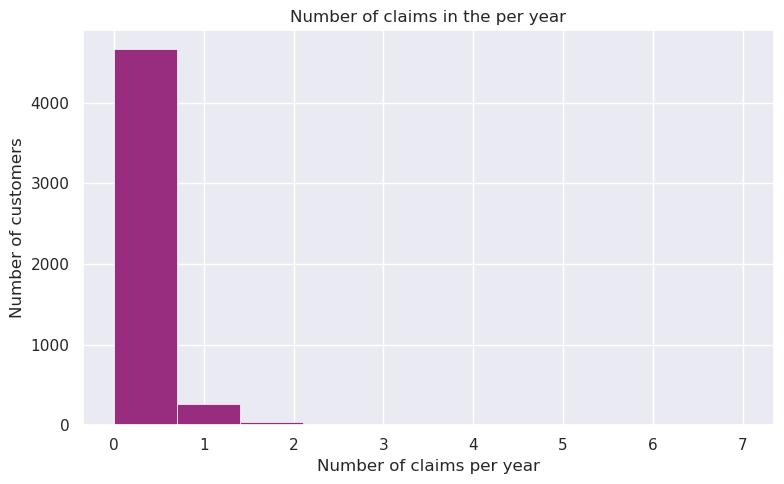

In [79]:
# Cell 14

plt.figure(figsize=(8,5), tight_layout=True)
df_customers.num_claims_past_year.hist(color=sns.color_palette('magma')[2], linewidth=0.5)
plt.title("Number of claims in the per year")
plt.xlabel("Number of claims per year")
plt.ylabel("Number of customers")


Text(0, 0.5, 'Number of customers')

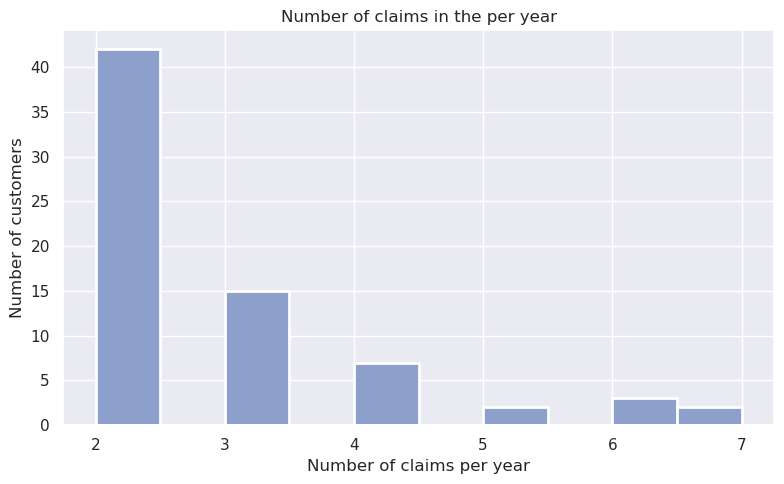

In [80]:
# Cell 14-2
plt.figure(figsize=(8,5), tight_layout=True)

df_customers.num_claims_past_year[lambda x: x >=2].hist(color=sns.color_palette('Set2')[2], linewidth=2)
plt.title("Number of claims in the per year")
plt.xlabel("Number of claims per year")
plt.ylabel("Number of customers")

Next, Let's check how the fraud claims are distributed between the two genders

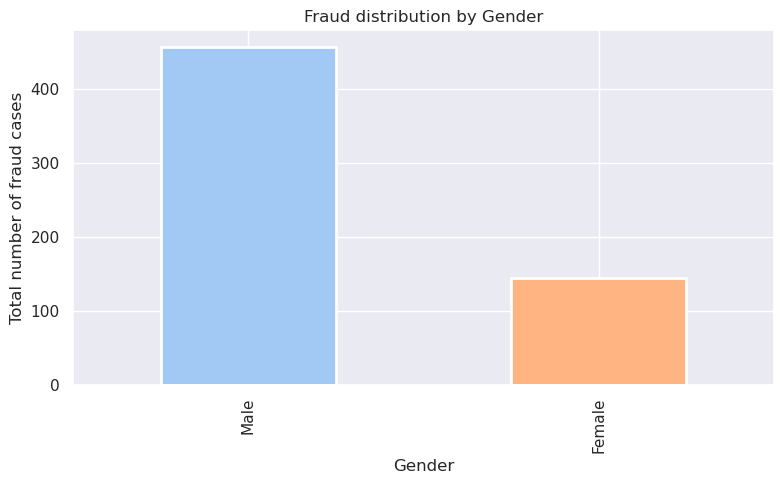

In [81]:
# Cell 15
plt.figure(figsize=(8,5), tight_layout=True)
df_combined.groupby("customer_gender_female").sum()["fraud"].plot.bar(color=colors[:2], linewidth=2)
plt.xticks([0,1], ["Male", "Female"])
plt.title("Fraud distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Total number of fraud cases");

In [82]:
#!pip install --upgrade seaborn
print(sns.__version__)

0.11.2


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

OptionError: No such keys(s): 'mode.use_inf_as_null'

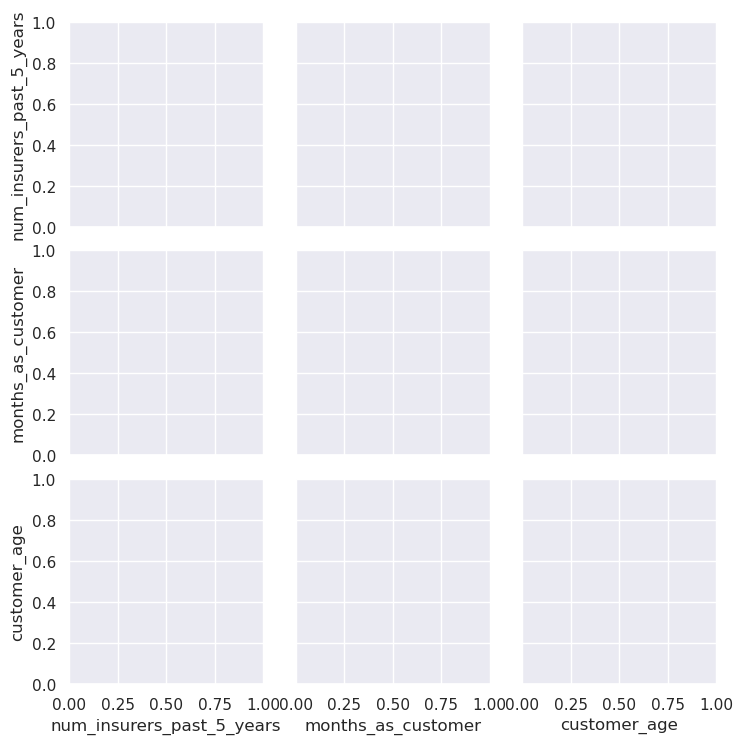

In [83]:
# Cell 16

ax = sns.pairplot(
    data=df_customers, 
    vars=["num_insurers_past_5_years", "months_as_customer", "customer_age"],
    palette='Set2'
);
ax.fig.set_figheight(8)
ax.fig.set_figwidth(8)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17/2772346492.py", line 4, in <module>
    ax = sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=df_combined, palette="Set2");
  File "/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py", line 46, in inner_f
  File "/opt/conda/lib/python3.10/site-packages/sea

Unexpected exception formatting exception. Falling back to standard exception


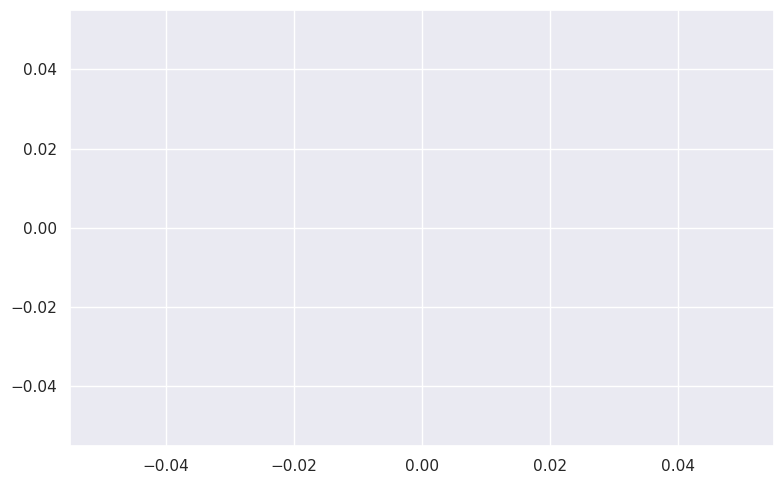

In [66]:
# cell 17

plt.figure(figsize=(8,5), tight_layout=True)
ax = sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=df_combined, palette="Set2");
ax.set(title="Correlation between number of insurers and fraud cases", xlabel="Number of insurers in the past 5 years", ylabel="Number of fraud cases")